## Week 2 데이터분석 및 시각화도구 리뷰 (1) 실습자료

### Pandas

### Series

- Series의 Index와 Value

In [1]:
import pandas as pd #pandas라이브러리를 pd라는 명칭으로 축약해 호출
import numpy as np #numpy 라이브러리를 np라는 명칭으로 축약해 호출

#Series의 Value와 Index를 변수 pandas_series에 선언
pandas_series=pd.Series([3000, 3200, 2700],
                       index=['2016-11-10', '2016-11-11', '2016-11-12'])

print(type(pandas_series)) #변수 pandas_series의 type 출력
pandas_series #변수 pandas_series 실행

<class 'pandas.core.series.Series'>


2016-11-10    3000
2016-11-11    3200
2016-11-12    2700
dtype: int64

- Series를 통해 원하는 위치의 값 출력

In [2]:
pandas_series[1:] #Series의 2번째 자리부터의 값 출력

2016-11-11    3200
2016-11-12    2700
dtype: int64

- Series(Dictionary) 사용 예제

In [3]:
import pandas as pd

menu={'커피':2000, '라떼':2500, '그린티': 3000, '카페모카': 3500, '카푸치노': 4000}
se=pd.Series(menu)
print(se)

커피      2000
라떼      2500
그린티     3000
카페모카    3500
카푸치노    4000
dtype: int64


In [4]:
print(se.index)
print(se.values)

Index(['커피', '라떼', '그린티', '카페모카', '카푸치노'], dtype='object')
[2000 2500 3000 3500 4000]


### DataFrame

- DataFrame 예제

In [5]:
import numpy as np # numpy 라이브러리를 np라는 명칭으로 축약해 호출
import pandas as pd # pandas라이브러리르 pd라는 명칭으로 축약해 호출

#DataFrame의 Value, Column, Index를 변수 df에 선언
df=pd.DataFrame([100, 150, 200, 250, 300], columns=['numbers'], index=['a', 'b', 'c', 'd', 'e'])
df

,numbers
a,100
b,150
c,200
d,250
e,300


- DataFrame 객체 활용 예제

In [6]:
df.index #DataFrame의 Index를 표시

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')

In [7]:
df.columns #DataFrame의 column을 표시

Index(['numbers'], dtype='object')

In [8]:
df.loc['c'] #DataFrame의 index값에서 c에 해당하는 값을 출력(loc은 인덱스 값 입력)

numbers    200
Name: c, dtype: int64

In [9]:
df.iloc[2] #DataFrame의 index값에서 c에 해당하는 값을 출력(iloc는 인덱스 숫자)

numbers    200
Name: c, dtype: int64

- DataFrame 연산

In [10]:
df.sum() #DataFrame의 Value를 모두 더함

numbers    1000
dtype: int64

In [11]:
df.numbers**2 #DataFrame의 numbers칼럼의 값을 제공함

a    10000
b    22500
c    40000
d    62500
e    90000
Name: numbers, dtype: int64

- DataFrame 추가 연산 함수 (axis 활용)

 - axis = 0을 주면 열의 합계를 구할 수 있음
 - axis = 1을 주면 행의 합계를 구할 수 있음

In [12]:
import pandas as pd

data=[[1.4, None],
     [7.1, -4.5],
      [None, None],
      [0.75, -1.3]]

temp_df=pd.DataFrame(data, columns=['one', 'two'], index=['a', 'b', 'c', 'd'])
temp_df

,one,two
a,1.40,NaN
b,7.10,-4.5
c,NaN,NaN
d,0.75,-1.3


In [13]:
temp_df.sum(axis=0) #열의 합계

one    9.25
two   -5.80
dtype: float64

In [14]:
temp_df.sum(axis=1) #행의 합계

a    1.40
b    2.60
c    0.00
d   -0.55
dtype: float64

In [15]:
temp_df['one'].sum() #특정 열에 대한 합

9.25

In [16]:
temp_df.loc['b'].sum() #특정 행에 대한 합

2.5999999999999996

- DataFrame에서 Column을 추가하는 방법

In [17]:
# DataFrame에 values라는 컬럼을 추가하고 값을 입력

df['values']=(10, 50, 40, 30, 60)
df

,numbers,values
a,100,10
b,150,50
c,200,40
d,250,30
e,300,60


- DataFrame의 Column 삭제

In [18]:
del df['values']
df

,numbers
a,100
b,150
c,200
d,250
e,300


- DataFrame에서 데이터를 맞추지 않았을 경우 다음과 같은 에러를 발생

In [19]:
df['values']=(10, 50, 40) #DataFrame의 인덱스 수를 맞추지 않으면 에러 발생
df

ValueError: Length of values (3) does not match length of index (5)

- DataFrame에서 Join 사용방법

In [20]:
#Column A에 1,2,3이라는 값을 넣음
df_1=pd.DataFrame(['1','2',"3"], columns=['A'])

#Column B에 4,5,6,7 값을 넣음
df_2=pd.DataFrame(['4','5','6','7'], columns=['B'])

df=df_1.join(df_2, how='outer') #두 개의 DataFrame을 outer join을 통해 합침
df #합친 DataFrame을 출력

,A,B
0,1,4
1,2,5
2,3,6
3,NaN,7


#### DataFrame을 이용한 연산

- DataFrame에 난수를 이용한 임의의 값 생성

In [21]:
import pandas as pd
import numpy as np

#random값을 넣은 DataFrame을 생성
#np.random.randn은 5행 5열의 랜덤 데이터를 생성
#재호출 시 데이터가 변형되므로 주의

df=pd.DataFrame(np.random.rand(5,5))
df.columns=['A','B', 'C', 'D', 'E']
df

,A,B,C,D,E
0,0.483951,0.104256,0.911011,0.548845,0.117823
1,0.913618,0.668393,0.592785,0.080890,0.583895
2,0.932098,0.416687,0.384924,0.124011,0.634665
3,0.249465,0.459754,0.660000,0.573558,0.944041
4,0.531855,0.352675,0.748739,0.444456,0.818451


In [22]:
df.max() #각 Column별 최댁값을 나타냄

A    0.932098
B    0.668393
C    0.911011
D    0.573558
E    0.944041
dtype: float64

In [23]:
df.min() #각 Column별 평균값을 나타냄

A    0.249465
B    0.104256
C    0.384924
D    0.080890
E    0.117823
dtype: float64

In [24]:
df.mean() #각 Column별 평균값을 나타냄

A    0.622197
B    0.400353
C    0.659492
D    0.354352
E    0.619775
dtype: float64

In [25]:
df.std() # 각 Column별 표준편차 값을 나타냄

A    0.294605
B    0.203462
C    0.194335
D    0.235497
E    0.315470
dtype: float64

In [26]:
df.cumsum() # 각 Column별 누적합 값을 나타냄

,A,B,C,D,E
0,0.483951,0.104256,0.911011,0.548845,0.117823
1,1.397569,0.772649,1.503797,0.629735,0.701719
2,2.329667,1.189336,1.888720,0.753746,1.336384
3,2.579132,1.649090,2.548720,1.327305,2.280425
4,3.110987,2.001765,3.297459,1.771761,3.098877


In [27]:
#Describe함수를 이용해 DataFrame 데이터 통계 요약값을 표현
df.describe()

,A,B,C,D,E
count,5.000000,5.000000,5.000000,5.000000,5.000000
mean,0.622197,0.400353,0.659492,0.354352,0.619775
std,0.294605,0.203462,0.194335,0.235497,0.315470
min,0.249465,0.104256,0.384924,0.080890,0.117823
25%,0.483951,0.352675,0.592785,0.124011,0.583895
50%,0.531855,0.416687,0.660000,0.444456,0.634665
75%,0.913618,0.459754,0.748739,0.548845,0.818451
max,0.932098,0.668393,0.911011,0.573558,0.944041


- Group by를 이용한 DataFrame의 그룹화

In [28]:
#Group by 하기 전 그룹별로 구분하기 위해 division이라는 Column을 생성
df['division']=['X','Y','X','Y','Z']
df

,A,B,C,D,E,division
0,0.483951,0.104256,0.911011,0.548845,0.117823,X
1,0.913618,0.668393,0.592785,0.080890,0.583895,Y
2,0.932098,0.416687,0.384924,0.124011,0.634665,X
3,0.249465,0.459754,0.660000,0.573558,0.944041,Y
4,0.531855,0.352675,0.748739,0.444456,0.818451,Z


In [29]:
#DataFrame에 Group by를 사용해 column 'division'의 값에 따라 평균값을 산출
df.groupby(['division']).mean()

,A,B,C,D,E
division,,,,,
X,0.708025,0.260471,0.647968,0.336428,0.376244
Y,0.581541,0.564074,0.626393,0.327224,0.763968
Z,0.531855,0.352675,0.748739,0.444456,0.818451


### Exercise

- (실습) Pandas로 울릉도의 바람세기 분석하기 (CSV파일 실습에서 수행한 내용을 Pandas를 이용하여 구현 )

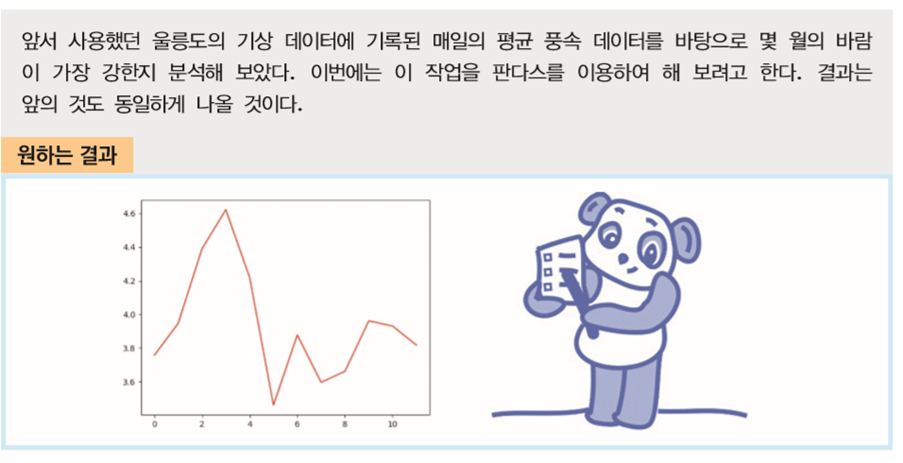

[힌트]

 -  '일시'라는 이름의 열을 사용하여 데이터를 다룰것이라 이것을 인덱스로 만들지 않고 그대로 연다.
 -  판다스는 이 데이터의 '일시'에 있는 것과 같이 날짜를 표시하는 방식으로 된 데이터를 DateTimeIndex 객체로 다룰 수 있다.
 -  해당 데이터 열을 이용하여 다음과 같이 생성할 수 있다
 
 
    pd.DateTimeIndex(weather['일시'])

여기서 연도와 달, 날을 얻는 방법은 아래와 같다

  - pd.DateTimeIndex(weather['일시']).year
  - pd.DateTimeIndex(weather['일시']).month
  - pd.DateTimeIndex(weather['일시']).day
  
  
  따라서 원래의 데이터에서 해당 데이터가 측정된 달의 정보만 담은 열을 새롭게 만들고 싶다면 다음과 같은 코드를 사용하면 된다
  
  weather['month'] = pd.DatetimeIndex(weather['일시']).month

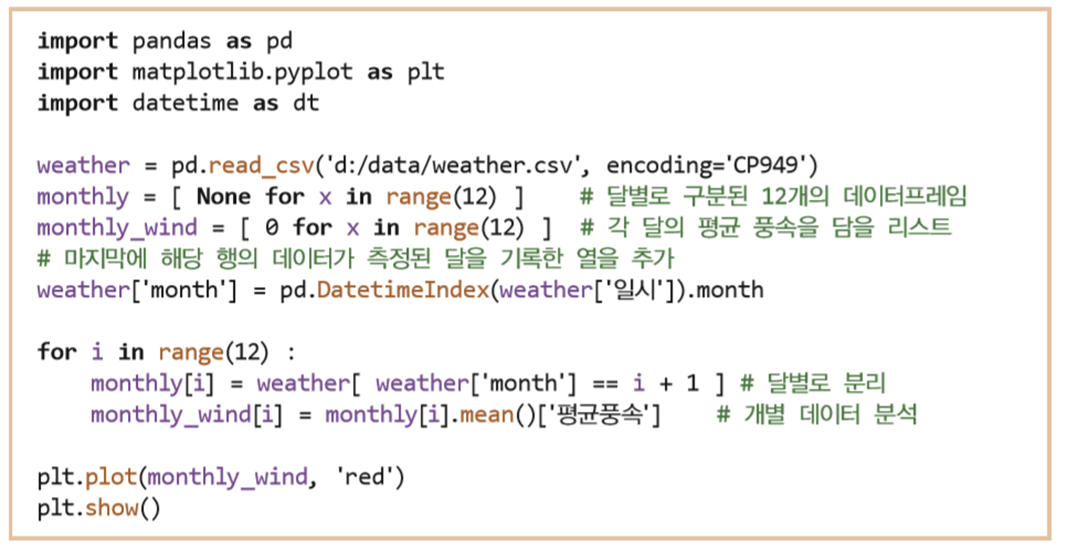

C:\Users\wjaud\AppData\Local\Temp\ipykernel_10608\275700474.py:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  monthly_wind[i]=monthly[i].mean()['평균풍속']


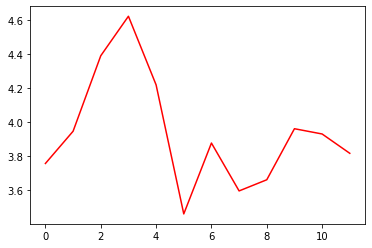

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

weather=pd.read_csv("C:/Users/wjaud/OneDrive/바탕 화면/학교/2022/2학기/빅데이터 시각화/Week2/weather.csv", encoding='CP949')
monthly=[None for x in range(12)] #달별로 구분된 12개의 데이터 프레임
monthly_wind=[0 for x in range(12)] #각 달의 평균 퐁속을 담을 리스트
#마지막에 해당 행의 데이터가 측정된 달을 기록한 열을 추가

weather['month']=pd.DatetimeIndex(weather['일시']).month

for i in range(12):
    monthly[i]=weather[weather['month']==i+1]#달별로 분리
    monthly_wind[i]=monthly[i].mean()['평균풍속']
    
plt.plot(monthly_wind, 'red')
plt.show()